In [5]:
#다중공선성과 변수선택

from statsmodels.datasets.longley import load_pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#미국의 거시경제지표 데이터 셋
#   TOTEMP - Total Employment 
#   GNPDEFL - GNP deflator 
#   GNP - GNP
#   UNEMP - Number of unemployed
#   ARMED -Size of armed forces
#   POP - population
#   YEAR - Year(1947 - 1962)

dfy = load_pandas().endog
print(dfy)
dfX = load_pandas().exog
print(dfX)
df = pd.concat([dfy,dfX], axis =1)
df.head()


0     60323.0
1     61122.0
2     60171.0
3     61187.0
4     63221.0
5     63639.0
6     64989.0
7     63761.0
8     66019.0
9     67857.0
10    68169.0
11    66513.0
12    68655.0
13    69564.0
14    69331.0
15    70551.0
Name: TOTEMP, dtype: float64
    GNPDEFL       GNP   UNEMP   ARMED       POP    YEAR
0      83.0  234289.0  2356.0  1590.0  107608.0  1947.0
1      88.5  259426.0  2325.0  1456.0  108632.0  1948.0
2      88.2  258054.0  3682.0  1616.0  109773.0  1949.0
3      89.5  284599.0  3351.0  1650.0  110929.0  1950.0
4      96.2  328975.0  2099.0  3099.0  112075.0  1951.0
5      98.1  346999.0  1932.0  3594.0  113270.0  1952.0
6      99.0  365385.0  1870.0  3547.0  115094.0  1953.0
7     100.0  363112.0  3578.0  3350.0  116219.0  1954.0
8     101.2  397469.0  2904.0  3048.0  117388.0  1955.0
9     104.6  419180.0  2822.0  2857.0  118734.0  1956.0
10    108.4  442769.0  2936.0  2798.0  120445.0  1957.0
11    110.8  444546.0  4681.0  2637.0  121950.0  1958.0
12    112.6  482704

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,60323.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,61122.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,60171.0,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,61187.0,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,63221.0,96.2,328975.0,2099.0,3099.0,112075.0,1951.0


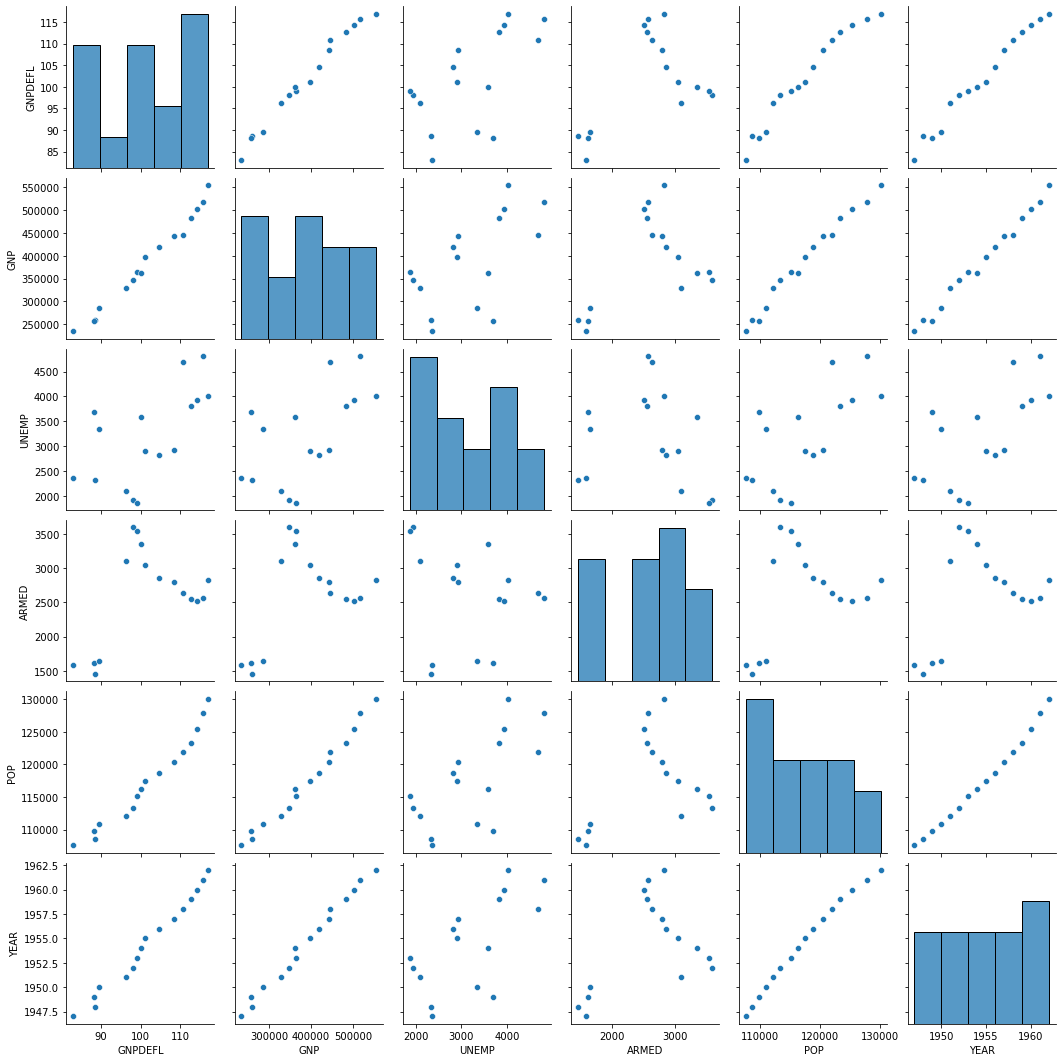

In [6]:
sns.pairplot(dfX)
plt.show()
#독립변수들간의 상관관계가 강한 데이터셋

In [7]:
dfX.corr()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
GNPDEFL,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149
GNP,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273
UNEMP,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257
ARMED,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245
POP,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953
YEAR,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000


<AxesSubplot:>

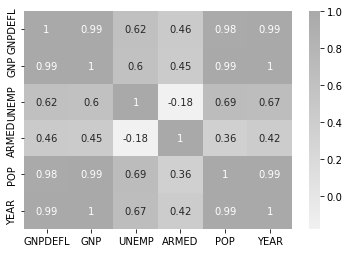

In [8]:
%matplotlib inline
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(dfX.corr(), annot=True, cmap=cmap)

In [10]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

def get_model1(seed) : 
    df_train, df_test = train_test_split(df, test_size=0.5, random_state=seed)
    model = sm.OLS.from_formula('TOTEMP ~ GNPDEFL + POP + GNP + YEAR + ARMED + UNEMP', data=df_train)
    return df_train, df_test, model.fit()

df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     437.5
Date:                Tue, 29 Mar 2022   Prob (F-statistic):             0.0366
Time:                        16:16:08   Log-Likelihood:                -44.199
No. Observations:                   8   AIC:                             102.4
Df Residuals:                       1   BIC:                             103.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.235e+07   2.97e+06     -4.165      0.1

/opt/homebrew/anaconda3/envs/virt/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


다중공선성 문제로 인하여 조건수(conditional number)가 증가한다 ??

In [11]:
#Total Sum of Square(종속변수 y의 분산)
#Residual Sum of Square(잔차의 분산, 오차의 크기)
def calc_r2(df_test, result) :
    target = df.loc[df_test.index].TOTEMP #실제값
    predict_test = result.predict(df_test) #예측값
    RSS = ((predict_test - target)**2).sum() #잔차의 분산
    TSS = ((target - target.mean())**2).sum() #실제값의 분산
    return 1 - RSS / TSS #결정계수

train1 = []
test1 = []
for i in range(10):
    df_train, df_test, result = get_model1(i)
    train1.append(calc_r2(df_train, result))
    test1.append(calc_r2(df_test, result))

#과적합 문제가 있음 > 왜..? 

#다중공선성은 VIF값으로 확인할 수 있다.
#다른 변수에 의족적일수록 VIF가 커진다(다중공선성)
#독립변수가 서로 의존하게 되면 과적합화 문제가 발생하여 모델의 안정성이 떨어질 수 있다.
#VIF(Variance Inflation Factor) 분산 팽창 요인

print(train1)
print('==========')
print(test1)

[0.9987038742050289, 0.9980503554982941, 0.9984751044825554, 0.9996192348457802, 0.9991092103164815, 0.9970491339294568, 0.9990327438989932, 0.9995684924269972, 0.999004344807219, 0.9998945799042543]
[0.9815050656847242, 0.9738497543077581, 0.9879366369895817, 0.7588861967898768, 0.9807206089303618, 0.893788931510489, 0.8798563810582657, 0.9314665778952249, 0.8608525682388156, 0.967719873513728]


In [14]:
#다중공선성을 해결하는 방법 > 변수 선택으로 의존적인 변수 제거
#PCA(주성분분석)
#정규화

16


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])] # shape[0]행 [1]열
vif['features'] = dfX.columns
vif

,VIF Factor,features
0,12425.514335,GNPDEFL
1,10290.435437,GNP
2,136.224354,UNEMP
3,39.983386,ARMED
4,101193.161993,POP
5,84709.950443,YEAR


In [16]:
#VIF와 pvalue가 높은 GNPDEFL, POP, YEAR 변수들을 제거하고 스케일링 처리한 모형
def get_model2(seed):
    df_train, df_test = train_test_split(df, test_size=0.5, random_state=seed)
    model =sm.OLS.from_formula('TOTEMP ~ scale(GNP) + scale(ARMED) + scale(UNEMP)', data=df_train)
    return df_test, df_test, model.fit()

df_train, df_test, result2 = get_model2(3)
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     118.6
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           0.000231
Time:                        17:12:59   Log-Likelihood:                -57.695
No. Observations:                   8   AIC:                             123.4
Df Residuals:                       4   BIC:                             123.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.538e+04    163.988    398.686   

/opt/homebrew/anaconda3/envs/virt/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [17]:
#오히려 성능이 향상됨 >prob?
#모형의 설명력도 개선됨 >..?
#과적합이 해소됨 >r squared?
# ..? 뭘보고

test2 = []
for i in range(10):
    df_train, df_test, result = get_model2(i)
    test2.append(calc_r2(df_test, result))

test2

[0.9763608388904903,
 0.9841984331185692,
 0.9687069366140135,
 0.939730405320176,
 0.9773357061188463,
 0.9561262155732311,
 0.9803852496698635,
 0.9917361722470805,
 0.9837134067639468,
 0.9789512977093203]

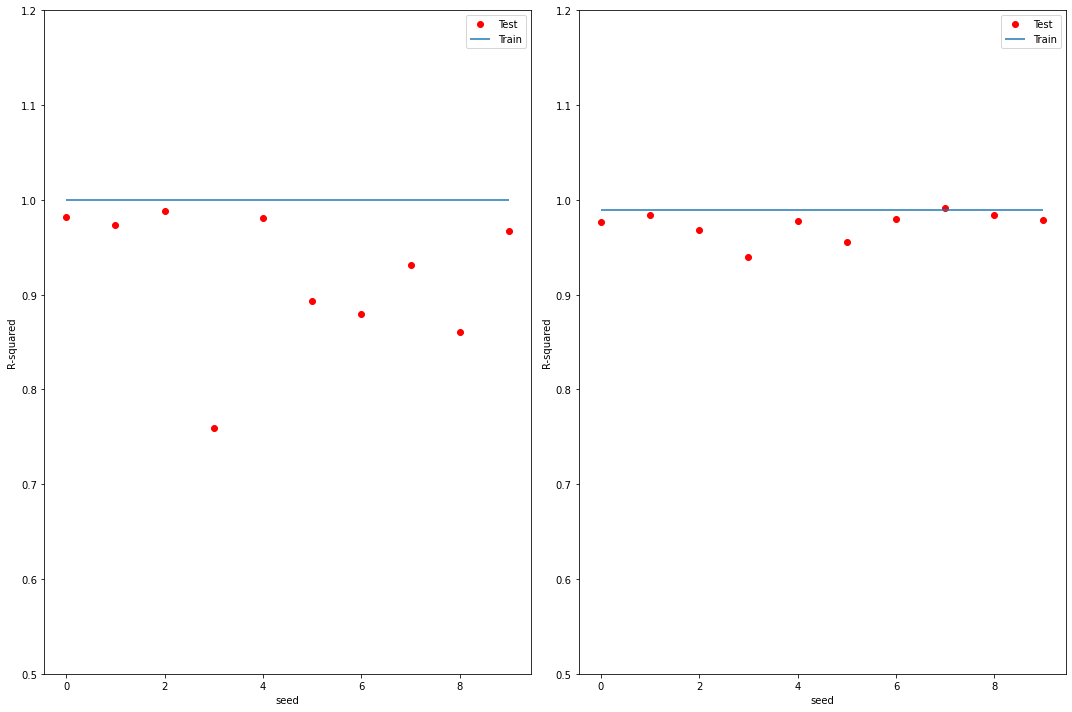

In [18]:
#다중공선성 제거 전
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.plot(test1, 'ro', label='Test')
plt.hlines(result1.rsquared, 0, 9, label='Train')
plt.legend()
plt.xlabel('seed')
plt.ylabel('R-squared')
plt.ylim(0.5, 1.2)

#다중공선성 제거 후
plt.subplot(122)
plt.plot(test2, 'ro', label='Test')
plt.hlines(result2.rsquared, 0, 9, label='Train')
plt.legend()
plt.xlabel('seed')
plt.ylabel('R-squared')
plt.ylim(0.5, 1.2)

plt.tight_layout()
plt.show()

In [19]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif['features'] = dfX.columns
vif = vif.sort_values('VIF Factor').reset_index(drop=True)
vif

,VIF Factor,features
0,39.983386,ARMED
1,136.224354,UNEMP
2,10290.435437,GNP
3,12425.514335,GNPDEFL
4,84709.950443,YEAR
5,101193.161993,POP


In [20]:
#VIF가 높은 값들을 제거하기 전의 모형
import numpy as np
model_boston1 = sm.OLS(np.log(dfy),dfX)
result_boston1 = model_boston1.fit()
print(result_boston1.summary())

                                 OLS Regression Results                                
Dep. Variable:                 TOTEMP   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.447e+06
Date:                Tue, 29 Mar 2022   Prob (F-statistic):                    1.18e-32
Time:                        17:29:39   Log-Likelihood:                          61.306
No. Observations:                  16   AIC:                                     -110.6
Df Residuals:                      10   BIC:                                     -106.0
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/homebrew/anaconda3/envs/virt/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [21]:
#VIF가 높은 변수들을 제거하고 최종적으로 선택한 독립변수들로 만든 모형
cols = ['intercept', 'CHAS', 'scale(B)', 'scale(CRIM)', 'scale(AGE)', 'scale(np.log(PTRATIO))', 'scale(RM)', 'scale(np.log(LSTAT))'] 

model_boston2 = sm.OLS(np.log(dfy), dfX[cols])
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

#결정계수 : 81.7% > 77.4%
#조건수 : 13.7 > 6.71 
# ..?

KeyError: "None of [Index(['intercept', 'CHAS', 'scale(B)', 'scale(CRIM)', 'scale(AGE)',\n       'scale(np.log(PTRATIO))', 'scale(RM)', 'scale(np.log(LSTAT))'],\n      dtype='object')] are in the [columns]"